<a href="https://colab.research.google.com/github/PrabishaPradeep/Dsa/blob/main/prabisha_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASE STUDY ON UNSUPERVISED LEARNING

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
wine=pd.read_csv('/content/Wine_clust .csv')
wine

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

### Check for null values

In [3]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There are no null values present in the dataset.

### Check for duplicates

In [4]:
wine.duplicated().sum()

0

There are no duplicates present in the dataset.

### Standard scaling

Clustering algorithms typically require feature scaling to ensure equal distance consideration across all features.
Without scaling, features with larger scales dominate the distance calculations, leading to biased clusters.

In [5]:
sc=StandardScaler()
wine_sc=sc.fit_transform(wine)
wine_sc=pd.DataFrame(wine_sc,columns=wine.columns)
wine_sc.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1  0.406051  1.113449  0.965242  
2  0.318304  0.788587  1.395148  
3 -0.427544  1.184071  2.334574  
4  0.362177  0.449601 -0.037874

# Clustering with original number of features

## K means clustering

### Find optimum number of clusters - Elbow method

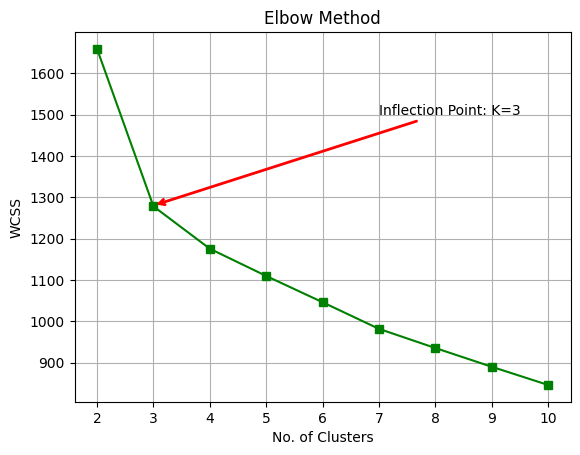

In [6]:
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(wine_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,11),wcss,'gs-')
plt.annotate('Inflection Point: K=3',
             xy=(3,1280),
             xytext=(7,1500),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))
plt.grid(True)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum no. of clusters = 3

### Create model with optimum number of clusters

In [7]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(wine_sc)
wine_sc['cluster'] = kmeans.labels_

### Plot clusters

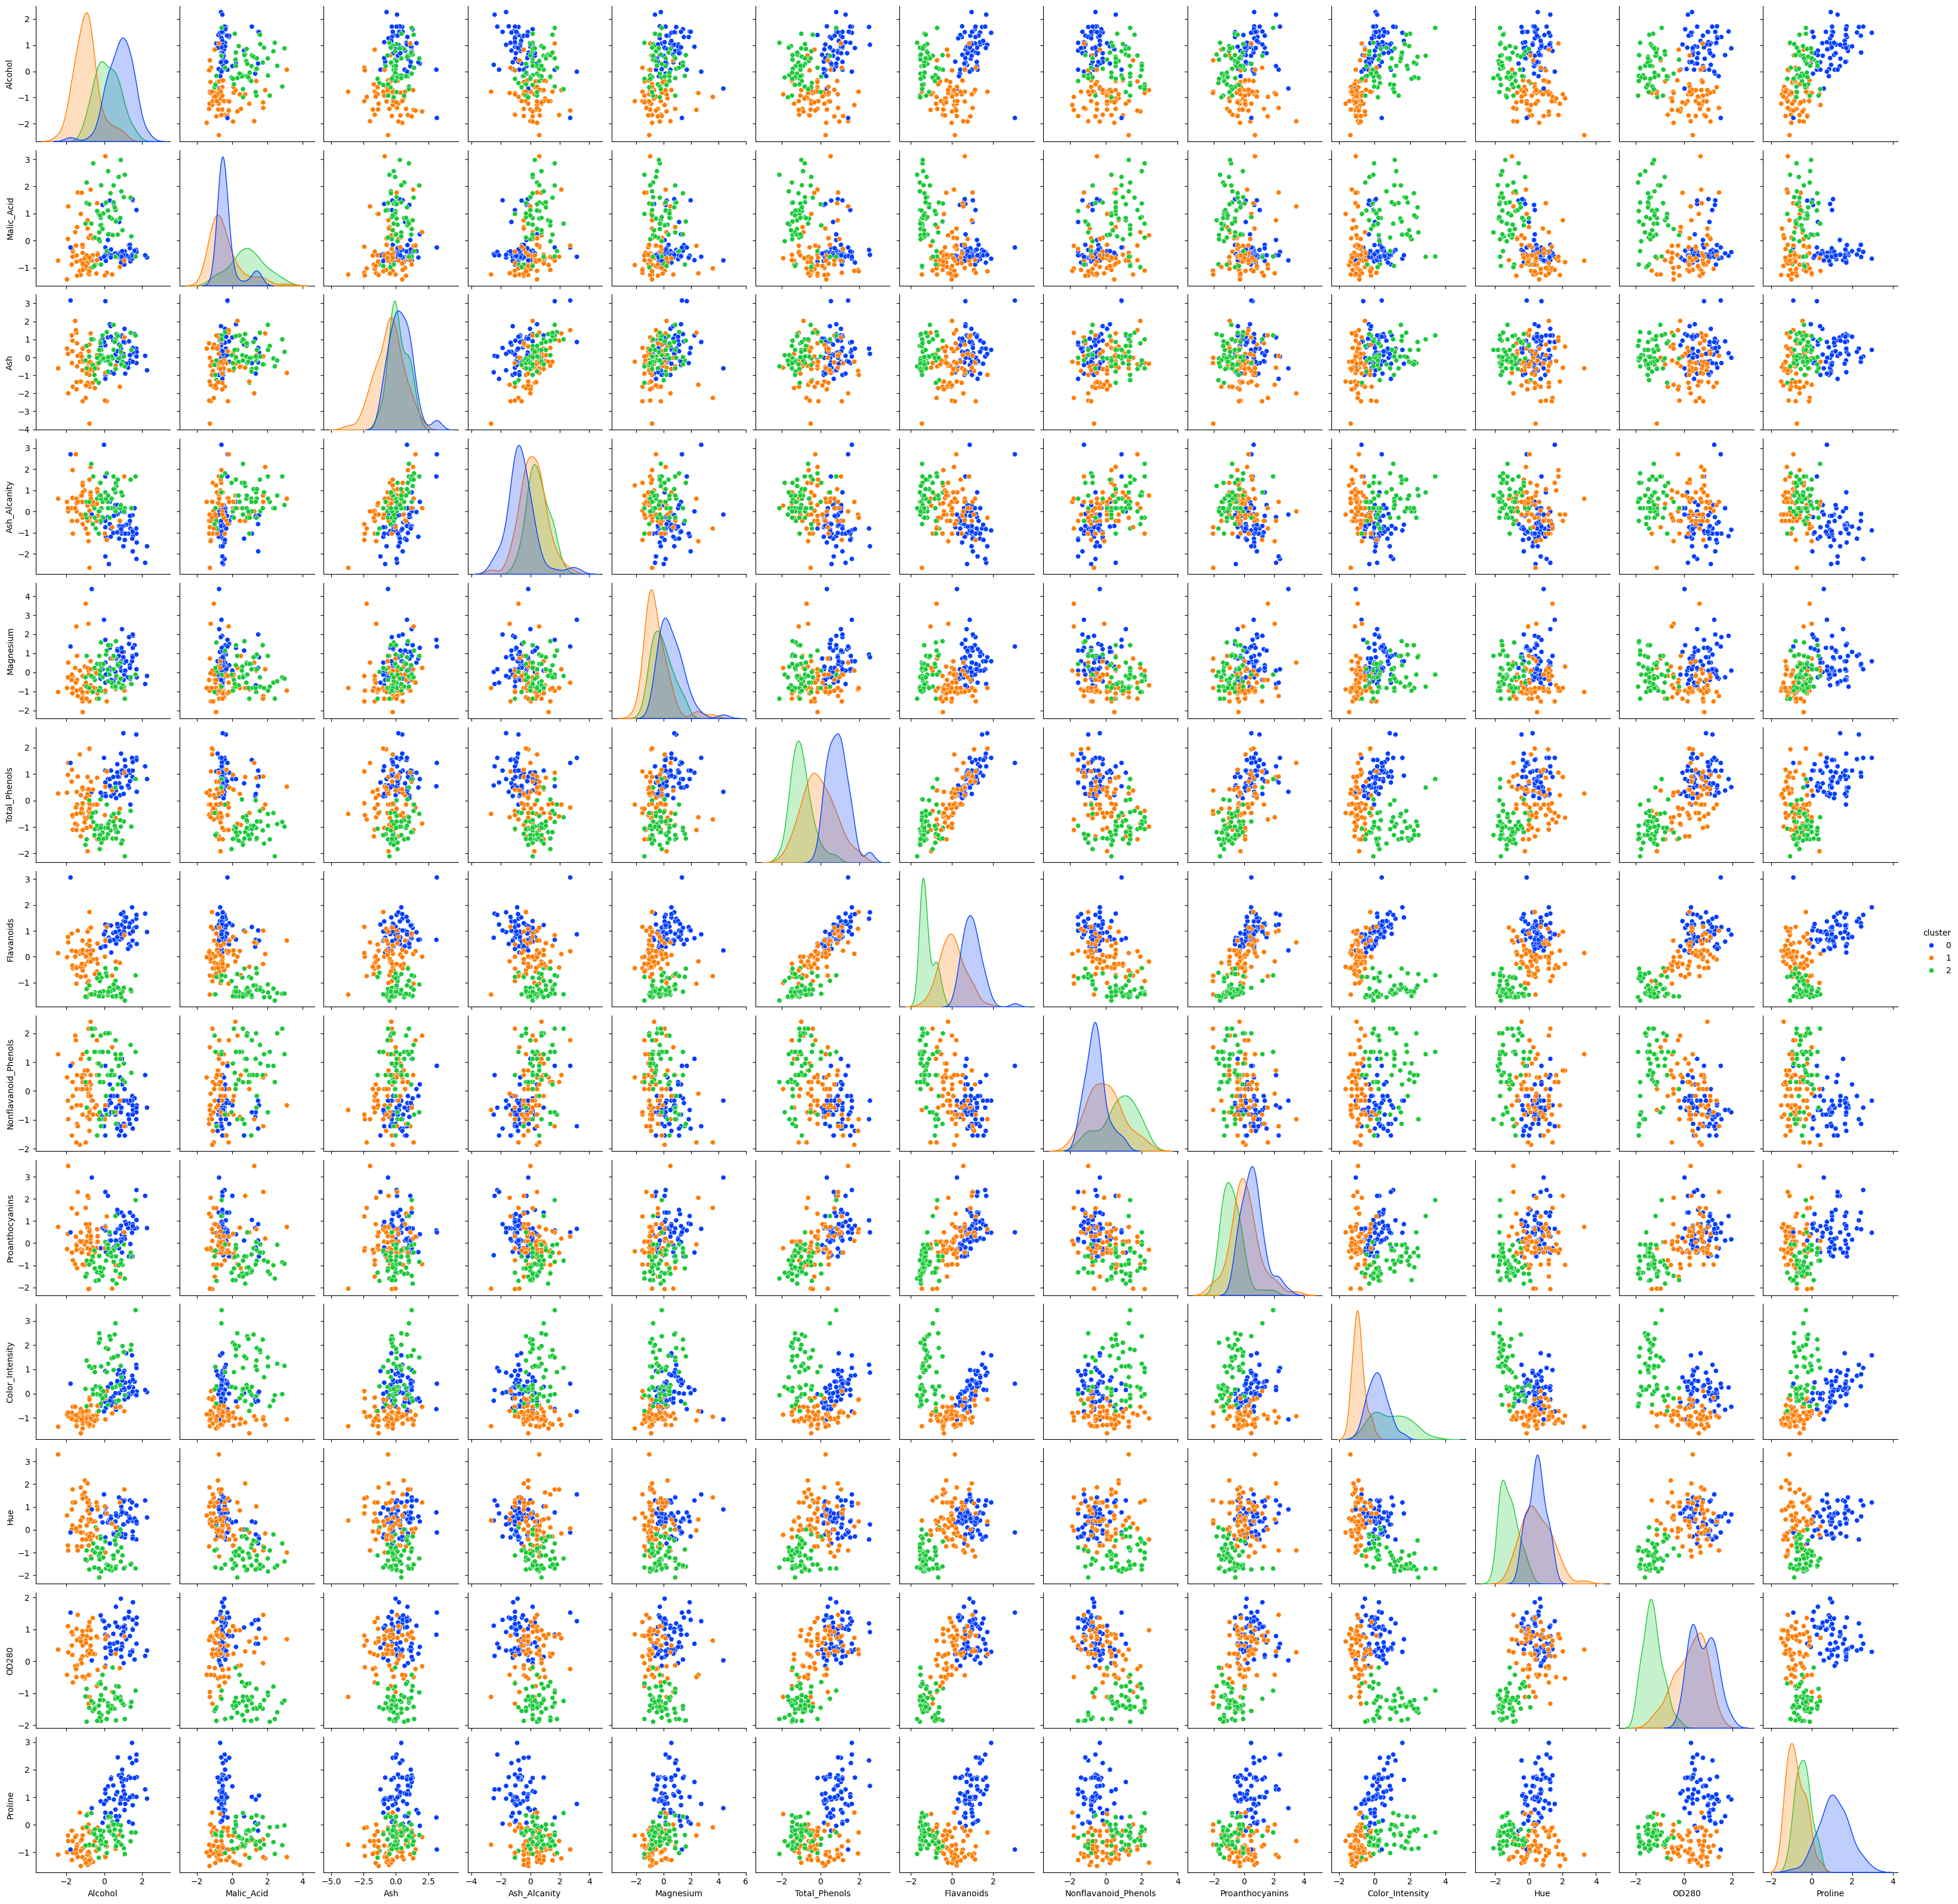

In [8]:
sns.pairplot(wine_sc, hue='cluster', palette='bright')
plt.show()

In [9]:
wine_sc.drop('cluster',axis=1,inplace=True)

### Evaluation metric - Silhouette score

In [10]:
silhouette_score_k=round(silhouette_score(wine_sc,kmeans.labels_),3)
silhouette_score_k

0.285

Silhouette score is less than 0.5 which means clustering is average. Clusters are overlapped.

## Agglomerative clustering

### Find optimum number of clusters - Dendrogram method

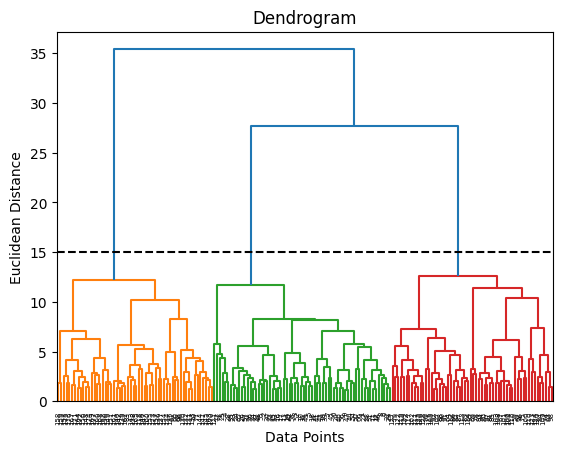

In [11]:
dend=sch.dendrogram(sch.linkage(wine_sc,method='ward'))
plt.axhline(y=15, color='black', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

Optimum no. of clusters = 3

### Create model with optimum number of clusters

In [12]:
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
hc.fit(wine_sc)
wine_sc['cluster'] = hc.labels_

### Plot clusters

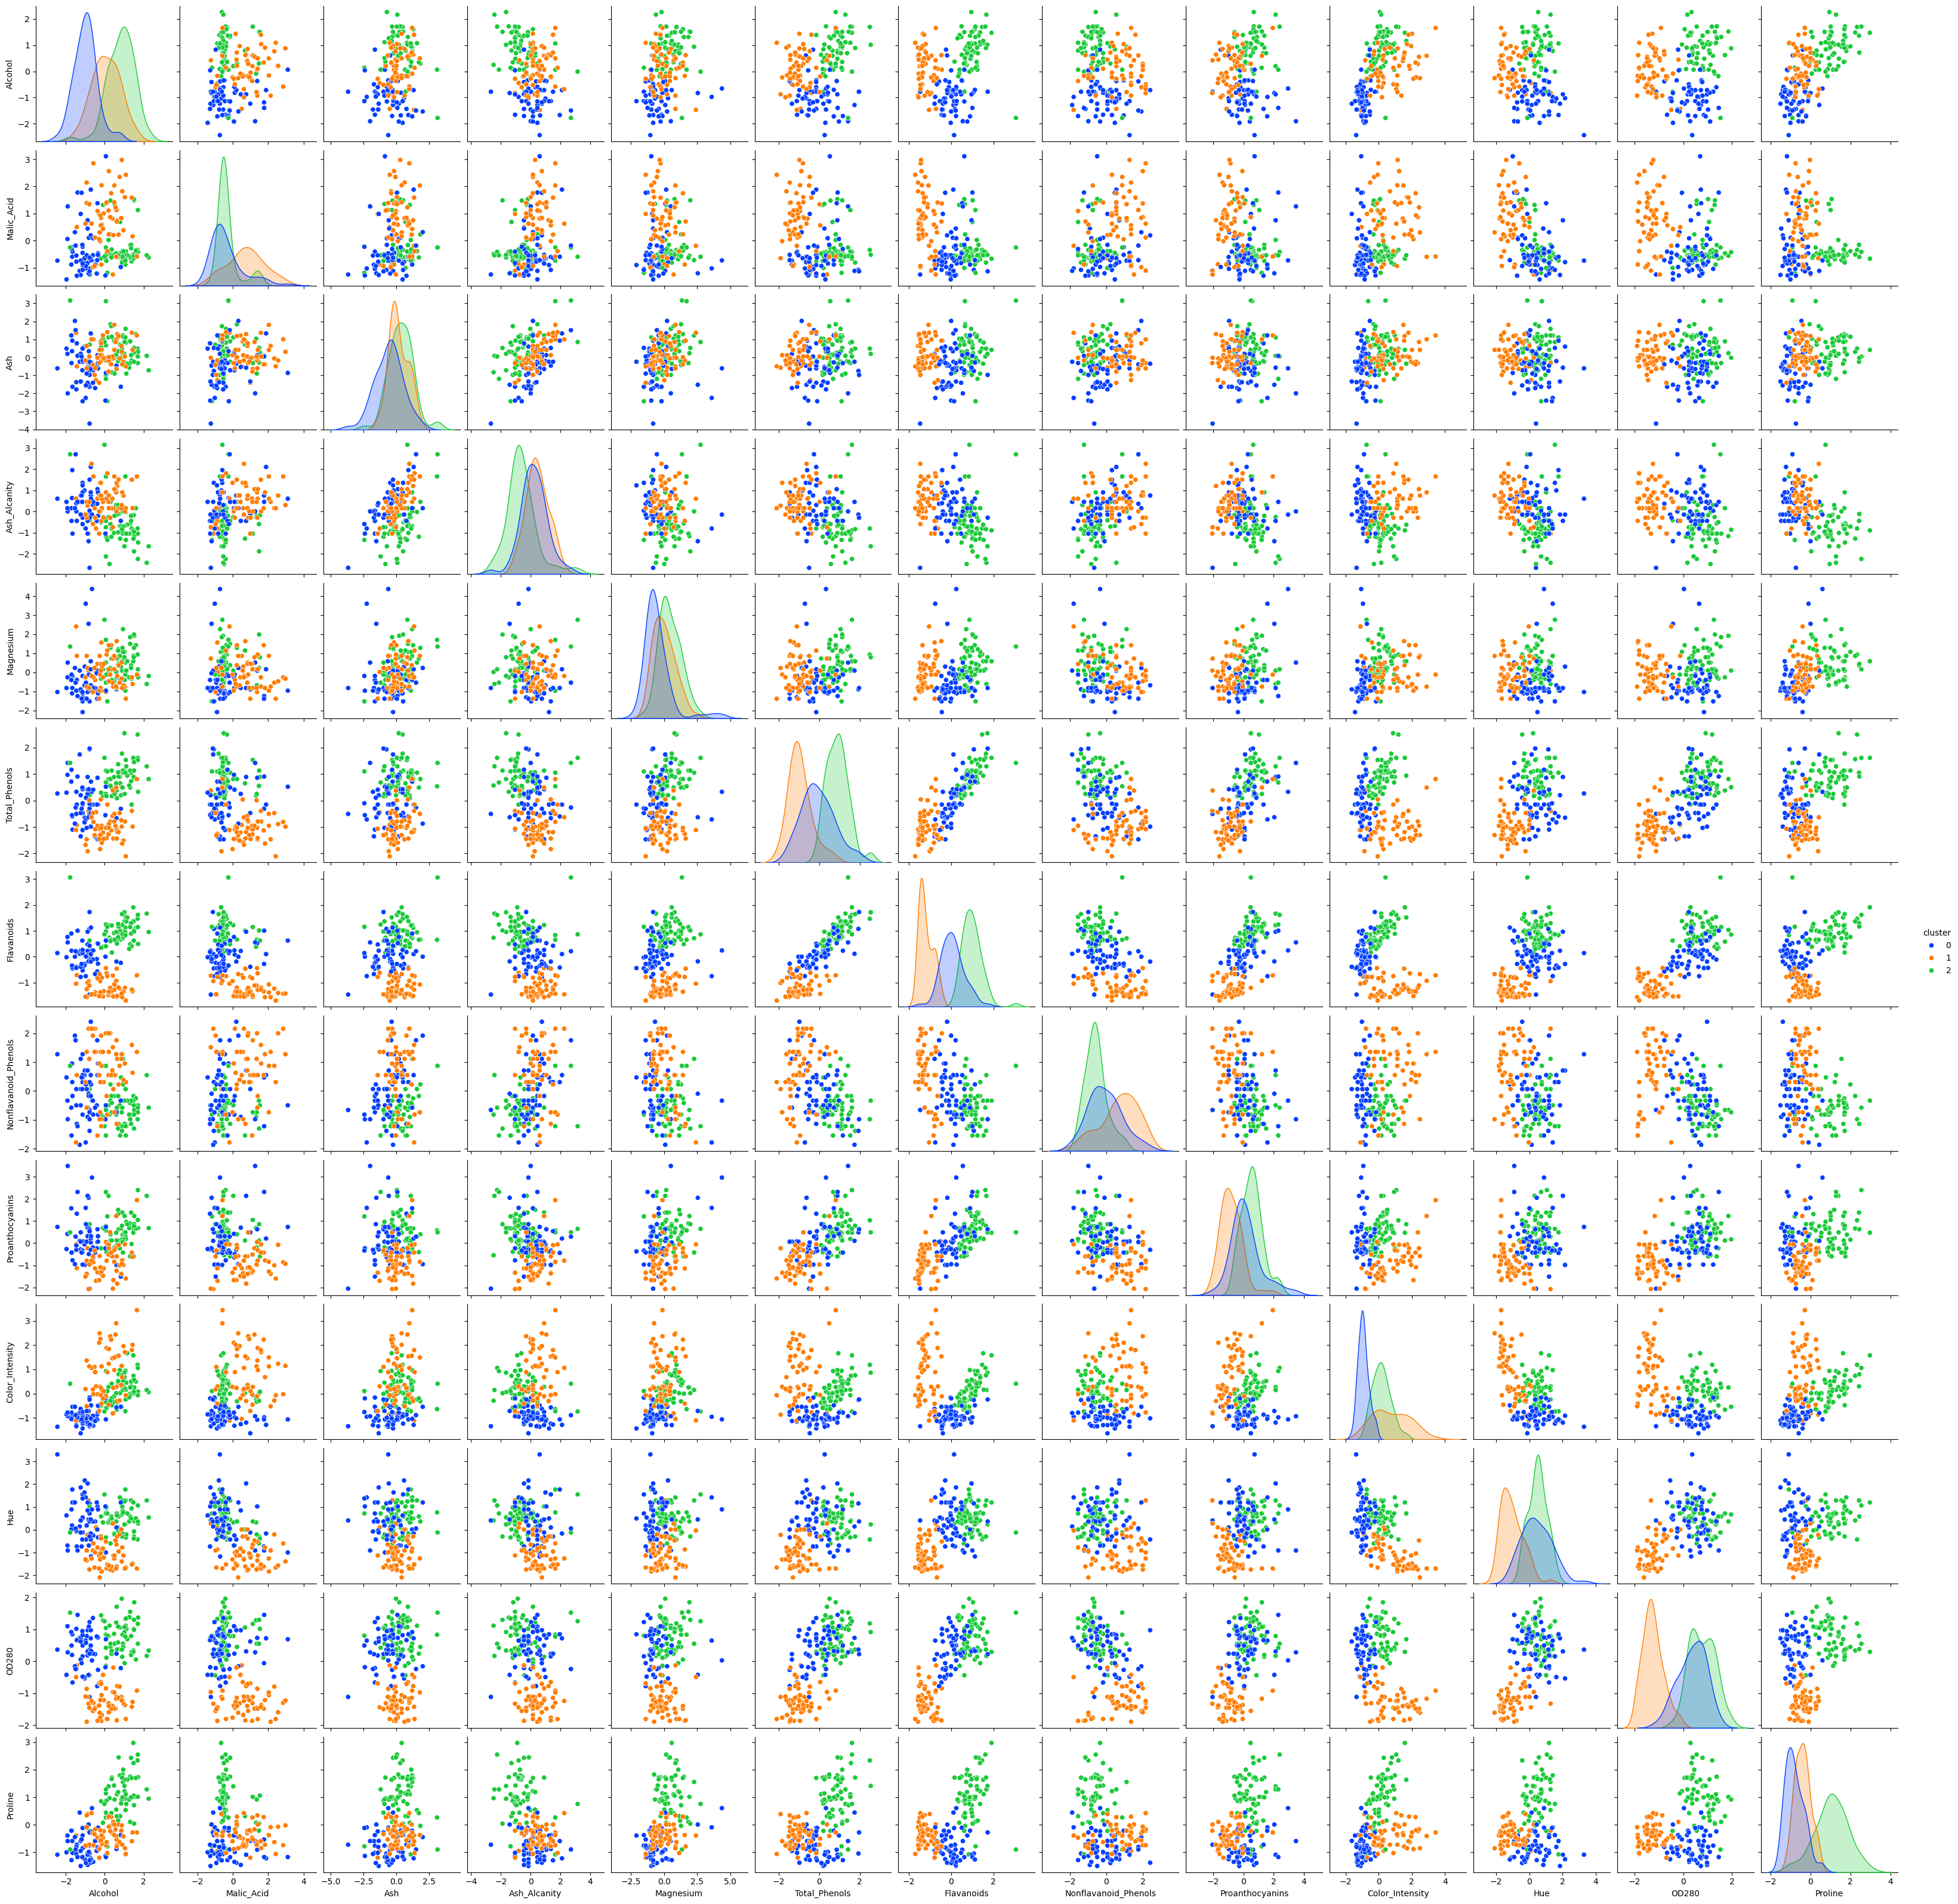

In [13]:
sns.pairplot(wine_sc, hue='cluster', palette='bright')
plt.show()

In [14]:
wine_sc.drop('cluster',axis=1,inplace=True)

### Evaluation metric - Silhouette score

In [15]:
silhouette_score_hc=round(silhouette_score(wine_sc,hc.labels_),3)
silhouette_score_hc

0.277

Silhouette score is less than 0.5 which means clustering is average. Clusters are overlapped.

## DBSCAN clustering

DBSCAN: Density Based Spatial Clustering of Applications with Noise

In [16]:
db=DBSCAN(eps=2.35, min_samples=5).fit(wine_sc)
y_db=db.fit_predict(wine_sc)
wine_sc['cluster']=db.labels_

### Plot clusters

In [ ]:
sns.pairplot(wine_sc, hue='cluster', palette='bright')
plt.show()

Here three clusters are formed. Blue represents the noisy points in the data (-1 cluster).

In [ ]:
wine_sc.drop('cluster',axis=1,inplace=True)

### Evaluation metric - Silhouette score

In [ ]:
silhouette_score_db=round(silhouette_score(wine_sc,y_db),3)
silhouette_score_db

Silhouette score is less than 0.5 which means clustering is average. Clusters are overlapped.

# Clustering with PCA

PCA - Principal Component Analysis

### Determine the number of principal components

In [ ]:
pca=PCA().fit(wine_sc)
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.xticks(np.arange(0, 14, step=1))
plt.ylabel('Cumulative Variance (%)')
plt.title('The Number of Components Needed to Explain Variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.55, color='g', linestyle='-')
plt.text(0.5, 0.5, '55% cut-off threshold', color = 'green', fontsize=16)
ax.grid(axis='x')
plt.show()

90% of cumulative variance is explained by 7 components. Also 55% of cumulative variance is explained by 2 components only.

# PCA with 7 components

Minimize the dataset from 13 features to 7 features using PCA

In [ ]:
pca=PCA(n_components=7).fit(wine_sc)
x_pca=pca.transform(wine_sc)
wine_pca=pd.DataFrame(x_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7'])
wine_pca.head()

## K means clustering

### Find optimum number of clusters - Elbow method

In [ ]:
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(wine_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,11),wcss,'gs-')
plt.annotate('Inflection Point: K=3',
             xy=(3,1030),
             xytext=(7,1200),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))
plt.grid(True)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum no. of clusters = 3

### Create model with optimum number of clusters

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(wine_pca)
wine_pca['cluster'] = kmeans.labels_

### Plot clusters

In [ ]:
sns.pairplot(wine_pca, hue='cluster', palette='bright')
plt.show()

In [ ]:
wine_pca.drop('cluster',axis=1,inplace=True)

### Evaluation metric - Silhouette score

In [ ]:
silhouette_score_k1=round(silhouette_score(wine_pca,kmeans.labels_),3)
silhouette_score_k1

Silhouette score is less than 0.5 which means clustering is average. Clusters are overlapped.

## Agglomerative clustering

### Find optimum number of clusters - Dendrogram method

In [ ]:
dend=sch.dendrogram(sch.linkage(wine_pca,method='ward'))
plt.axhline(y=17, color='black', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

Optimum no. of clusters = 3

### Create model with optimum number of clusters

In [ ]:
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
hc.fit(wine_pca)
wine_pca['cluster'] = hc.labels_

### Plot clusters

In [ ]:
sns.pairplot(wine_pca, hue='cluster', palette='bright')
plt.show()

In [ ]:
wine_pca.drop('cluster',axis=1,inplace=True)

### Evaluation metric - Silhouette score

In [ ]:
silhouette_score_hc1=round(silhouette_score(wine_pca,hc.labels_),3)
silhouette_score_hc1

Silhouette score is less than 0.5 which means clustering is average. Clusters are overlapped.

## DBSCAN clustering

In [ ]:
db=DBSCAN(eps=1.95, min_samples=5).fit(wine_pca)
y_db=db.fit_predict(wine_pca)
wine_pca['cluster']=db.labels_

### Plot clusters

In [ ]:
sns.pairplot(wine_pca, hue='cluster', palette='bright')
plt.show()

Here three clusters are formed. Blue represents the noisy points in the data (-1 cluster).

In [ ]:
wine_pca.drop('cluster',axis=1,inplace=True)

### Evaluation metric - Silhouette score

In [ ]:
silhouette_score_db1=round(silhouette_score(wine_pca,y_db),3)
silhouette_score_db1

Silhouette score is less than 0.5 which means clustering is average. There is some overlapping between clusters.

# PCA with 2 components

Minimize the dataset from 13 features to 2 features using PCA

In [ ]:
pca=PCA(n_components=2).fit(wine_sc)
x_pca=pca.transform(wine_sc)
x_pca=pd.DataFrame(x_pca,columns=['PCA1','PCA2'])
x_pca.head()

## K means clustering

### Find optimum number of clusters - Elbow method

In [ ]:
x=x_pca.values

In [ ]:
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,11),wcss,'gs-')
plt.annotate('Inflection Point: K=3',
             xy=(3,260),
             xytext=(7,400),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))
plt.grid(True)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum no. of clusters = 3

### Create model with optimum number of clusters

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(x)

### Plot clusters

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.title('Wine Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### Evaluation metric - Silhouette score

In [ ]:
silhouette_score_k2=round(silhouette_score(x,y_kmeans),3)
silhouette_score_k2

Silhouette score is greater than 0.5 which means clustering is good, overlapping between clusters is less.

## Agglomerative clustering

### Find optimum number of clusters - Dendrogram method

In [ ]:
dend=sch.dendrogram(sch.linkage(x,method='ward'))
plt.axhline(y=20, color='black', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

Optimum no. of clusters = 3

### Create model with optimum number of clusters

In [ ]:
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

### Plot clusters

In [ ]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='Cluster 3')
plt.title('Wine Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### Evaluation metric - Silhouette score

In [ ]:
silhouette_score_hc2=round(silhouette_score(x,y_hc),3)
silhouette_score_hc2

Silhouette score is greater than 0.5 which means clustering is good, overlapping between clusters is less.

## DBSCAN clustering

In [ ]:
db = DBSCAN(eps=0.55, min_samples=5).fit(x)
y_db=db.fit_predict(x)
cluster=db.labels_

### Plot clusters

In [ ]:
sns.scatterplot(data = x_pca, x = 'PCA1', y = 'PCA2', hue = cluster, palette='bright')
plt.title('Wine Cluster')
plt.legend(title='Cluster')
plt.show()

Here four clusters are formed. Blue represents the noisy points in the data (-1 cluster).

### Evaluation metric - Silhouette score

In [ ]:
silhouette_score_db2=round(silhouette_score(x,y_db),3)
silhouette_score_db2

Silhouette score is less than 0.5 which means clustering is average. There is some overlapping between clusters.

# Comparison between clustering models

In [ ]:
mux = pd.MultiIndex.from_product([['No. of Features used for Clustering'],['Full (13)','7','2']])
Metric=['Kmeans','Agglomerative','DBSCAN']
comp_table = pd.DataFrame([[silhouette_score_k,silhouette_score_k1,silhouette_score_k2],[silhouette_score_hc,silhouette_score_hc1,silhouette_score_hc2],[silhouette_score_db,silhouette_score_db1,silhouette_score_db2]] , columns=mux)
comp_table.index=Metric
comp_table = comp_table.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
comp_table

OBSERVATIONS:

1. K means clustering perform better for all the 3 cases - clustering with original number of features, clustering with 7 features by PCA and clustering with 2 features by PCA.
2. When we reduce number of features by PCA, our clustering got improved in all the 3 clustering techniques.